<a href="https://colab.research.google.com/github/Inyrkz/breast_cancer/blob/main/k_fold_cv_article_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline

# load dataset
dataset = pd.read_csv('breast_cancer_data.csv')
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
# check dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Separate features and target variable
X = dataset.iloc[:, 2:-1].values
y = dataset. iloc [:, 1].values
print("Matrix of features", X, sep='\n')
print("--------------------------------------------------")
print("Target Variable", y, sep='\n')

Matrix of features
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
--------------------------------------------------
Target Variable
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B'

In [ ]:
# Label Encode the target variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                     label_encoder.transform(label_encoder.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")
print("Label Encoded Target Variable", encoded_y, sep="\n")

Mapping of Label Encoded Classes
{'B': 0, 'M': 1}
Label Encoded Target Variable
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0

In [ ]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate

def cross_validation(model, _X, _y, _cv=5):
  '''Function to perform 5 Folds Cross-Validation

   Parameters
   ----------
  model : Python Class, default=None
          This is the machine learning algorithm to be used for training.

  _X : array
       This is the matrix of features.

  _y: array
       This is the  target variable.

  _cv : int, default=5
      Determines the number of folds for cross-validation.

   Returns
   -------
   Function returns a dictionary containing the metrics 'accuracy', 'precision',
   'recall', 'f1' for both training set and validation set.
  '''

  _scoring = ['accuracy', 'precision', 'recall', 'f1']
  results = cross_validate(estimator=model,
                           X=_X,
                           y=_y,
                           cv=_cv,
                           scoring=_scoring,
                           return_train_score=True)
  
  return {"Training Accuracy scores": results['train_accuracy'],
          "Mean Training Accuracy": results['train_accuracy'].mean()*100,
          "Training Precision scores": results['train_precision'],
          "Mean Training Precision": results['train_precision'].mean(),
          "Training Recall scores": results['train_recall'],
          "Mean Training Recall": results['train_recall'].mean(),
          "Training F1 scores": results['train_f1'],
          "Mean Training F1 Score": results['train_f1'].mean(),
          "Validation Accuracy scores": results['test_accuracy'],
          "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
          "Validation Precision scores": results['test_precision'],
          "Mean Validation Precision": results['test_precision'].mean(),
          "Validation Recall scores": results['test_recall'],
          "Mean Validation Recall": results['test_recall'].mean(),
          "Validation F1 scores": results['test_f1'],
          "Mean Validation F1 Score": results['test_f1'].mean()
          }

In [ ]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
    '''Function to plot a grouped bar chart showing the training and validation
      results of the ML model in each fold after applying K-fold cross validation.

     Parameters
     ----------
     x_label: str, 
        Name of the algorithm used for training e.g 'Decision Tree'
      
     y_label: str, 
        Name of metric being visualized e.g 'Accuracy'

     plot_title: str, 
        This is the title of the plot e.g 'Accuracy Plot'
     
     train_result: list, array
        This is the list containing either training precision, accuracy, or f1 score.
    
     val_result: list, array
        This is the list containing either validation precision, accuracy, or f1 score.

     Returns
     -------
     Function returns a Grouped Barchart showing the training and validation result
     in each fold.
    '''
    
    # Set size of plot
    plt.figure(figsize=(12,6))
    labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
    X_axis = np.arange(len(labels))

    ax = plt.gca()
    plt.ylim(0.40000, 1)
    plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
    plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
    plt.title(plot_title, fontsize=30)
    plt.xticks(X_axis, labels)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                             random_state=0)
decision_tree_result = cross_validation(decision_tree_model, X, encoded_y, 5)
print(decision_tree_result)

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), 'Mean Training F1 Score': 1.0, 'Validation Accuracy scores': array([0.9122807 , 0.92105263, 0.94736842, 0.94736842, 0.94690265]), 'Mean Validation Accuracy': 93.49945660611706, 'Validation Precision scores': array([0.92307692, 0.94736842, 0.90909091, 0.89130435, 0.89130435]), 'Mean Validation Precision': 0.9124289897745275, 'Validation Recall scores': array([0.8372093 , 0.8372093 , 0.95238095, 0.97619048, 0.97619048]), 'Mean Validation Recall': 0.9158361018826134, 'Validation F1 scores': array([0.87804878, 0.88888889, 0.93023256, 0.93181818, 0.93181818]), 'Mean Validation F1 Score': 0.9121613182305184}


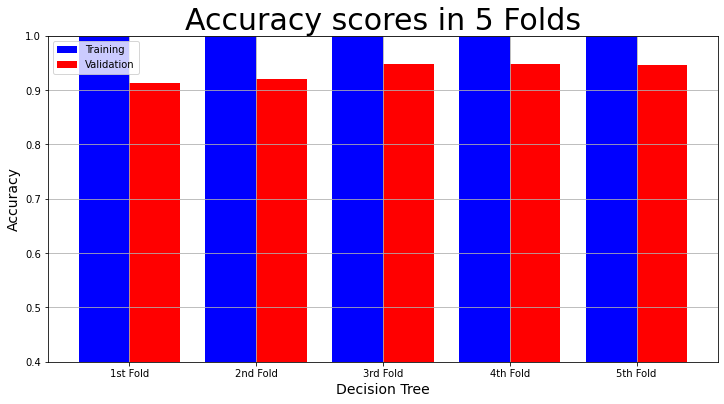

In [ ]:
# Plot Accuracy Result
model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

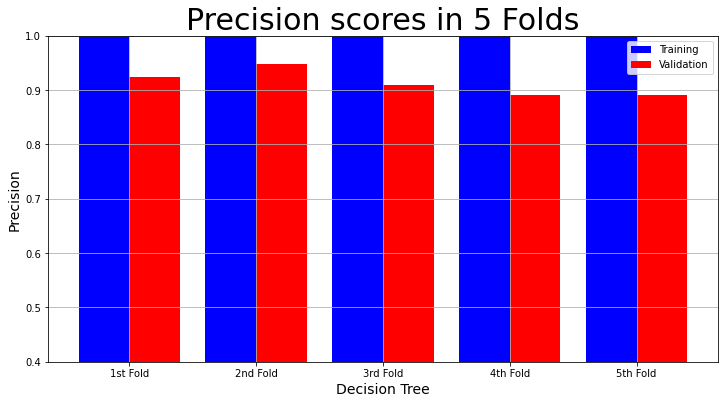

In [ ]:
# Plot Precision Result
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            decision_tree_result["Training Precision scores"],
            decision_tree_result["Validation Precision scores"])

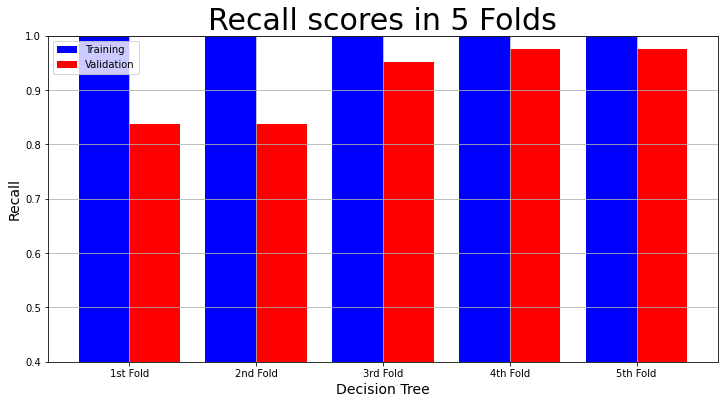

In [ ]:
# Plot Recall Result
plot_result(model_name,
            "Recall",
            "Recall scores in 5 Folds",
            decision_tree_result["Training Recall scores"],
            decision_tree_result["Validation Recall scores"])

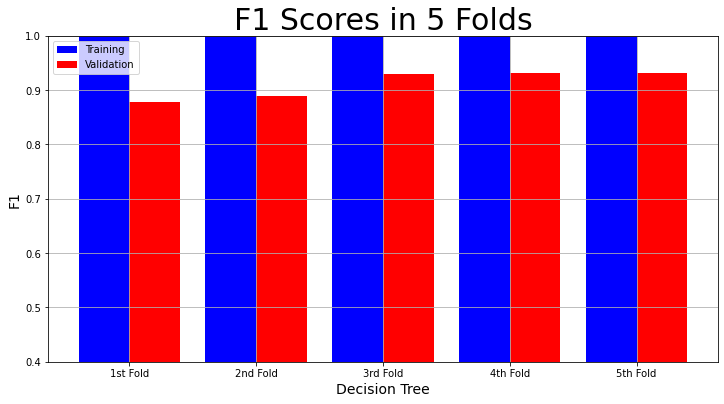

In [ ]:
# Plot F1-Score Result
plot_result(model_name,
            "F1",
            "F1 Scores in 5 Folds",
            decision_tree_result["Training F1 scores"],
            decision_tree_result["Validation F1 scores"])

In [ ]:
decision_tree_model_2 = DecisionTreeClassifier(criterion="entropy",
                                               min_samples_split=5,
                                               random_state=0)

decision_tree_result_2 = cross_validation(decision_tree_model_2, X, encoded_y, 5)
print(decision_tree_result_2)

{'Training Accuracy scores': array([0.99340659, 0.99340659, 1.        , 0.9956044 , 0.99342105]), 'Mean Training Accuracy': 99.51677270098322, 'Training Precision scores': array([1.        , 1.        , 1.        , 1.        , 0.99408284]), 'Mean Training Precision': 0.9988165680473372, 'Training Recall scores': array([0.98224852, 0.98224852, 1.        , 0.98823529, 0.98823529]), 'Mean Training Recall': 0.9881935259310826, 'Training F1 scores': array([0.99104478, 0.99104478, 1.        , 0.99408284, 0.99115044]), 'Mean Training F1 Score': 0.9934645669906736, 'Validation Accuracy scores': array([0.92105263, 0.93859649, 0.94736842, 0.93859649, 0.94690265]), 'Mean Validation Accuracy': 93.85033379909953, 'Validation Precision scores': array([0.925     , 1.        , 0.90909091, 0.88888889, 0.89130435]), 'Mean Validation Precision': 0.9228568291611768, 'Validation Recall scores': array([0.86046512, 0.8372093 , 0.95238095, 0.95238095, 0.97619048]), 'Mean Validation Recall': 0.9157253599114064

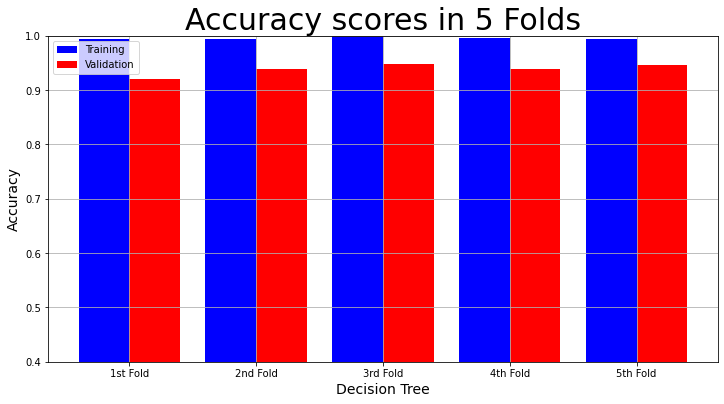

In [ ]:
# Plot Accuracy Result
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result_2["Training Accuracy scores"],
            decision_tree_result_2["Validation Accuracy scores"])

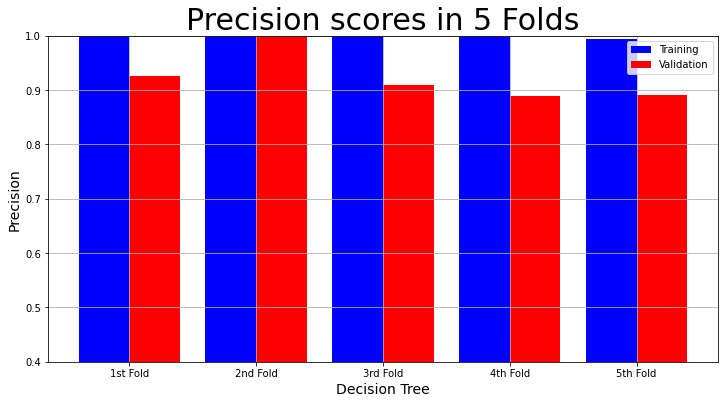

In [ ]:
# Plot Precision Result
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            decision_tree_result_2["Training Precision scores"],
            decision_tree_result_2["Validation Precision scores"])

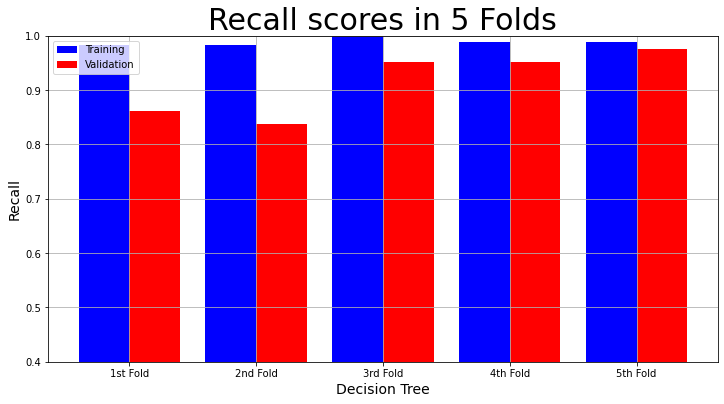

In [ ]:
# Plot Recall Result
plot_result(model_name,
            "Recall",
            "Recall scores in 5 Folds",
            decision_tree_result_2["Training Recall scores"],
            decision_tree_result_2["Validation Recall scores"])

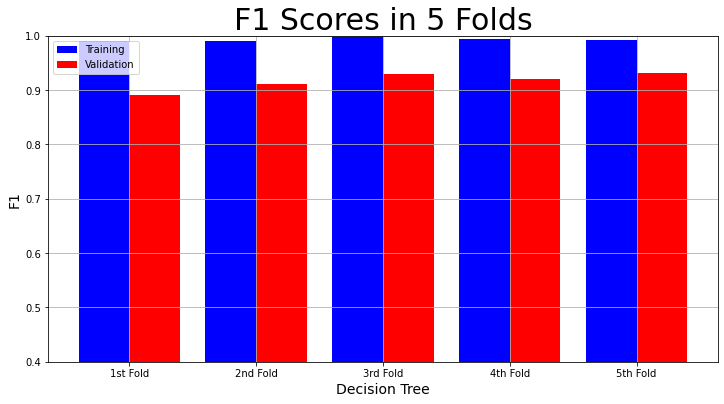

In [ ]:
# Plot F1-Score Result
plot_result(model_name,
            "F1",
            "F1 Scores in 5 Folds",
            decision_tree_result_2["Training F1 scores"],
            decision_tree_result_2["Validation F1 scores"])